## Iris dataset
The Iris flower data set is introduced by R. Fisher in 1936. This dataset is often used for testing
perfomance of diffrent machine learning algorithms. It consist of 50 samples from each of three species
of iris. Iris dataset is published and distributed by __[UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/iris)__

In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from collections import OrderedDict


%matplotlib inline


In [2]:
column_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
df = pd.read_csv('input/iris.data', names=column_names)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

The dataset consist of 150 examples and 4 features. Target variable is 'Class'. All features are floats,
target variable is a string. Dataset doesn't have NaN or null values.

In [6]:
df['Class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Class, dtype: int64

In [7]:
change_names = {'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica', 'Iris-setosa': 'setosa'}
df['Class'] = df['Class'].map(change_names)

In [8]:
df['Class'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Class, dtype: int64

In [9]:
df.groupby('Class').mean()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Class,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


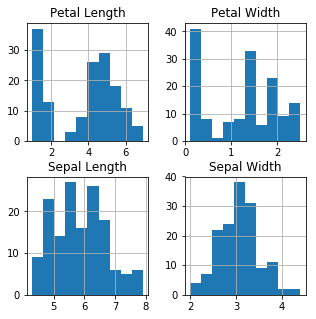

In [10]:
df.hist(figsize=(5,5))
plt.show()

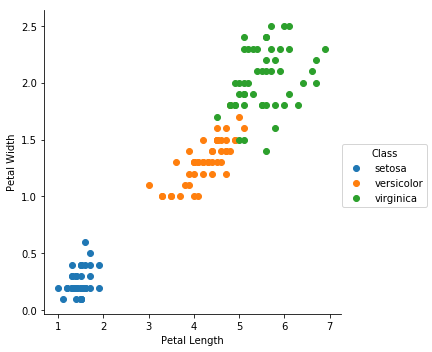

In [11]:

sns.FacetGrid(data=df, hue='Class', size=5).map(plt.scatter, 'Petal Length', 'Petal Width').add_legend()
plt.show()

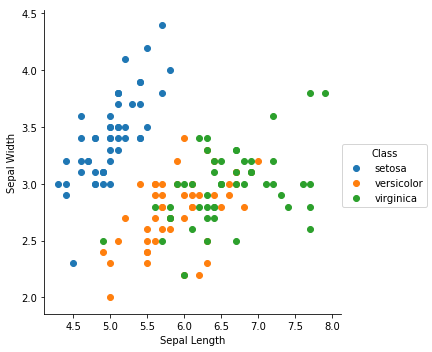

In [12]:
sns.FacetGrid(data=df, hue='Class', size=5).map(plt.scatter, 'Sepal Length', 'Sepal Width').add_legend()
plt.show()

E:\Anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


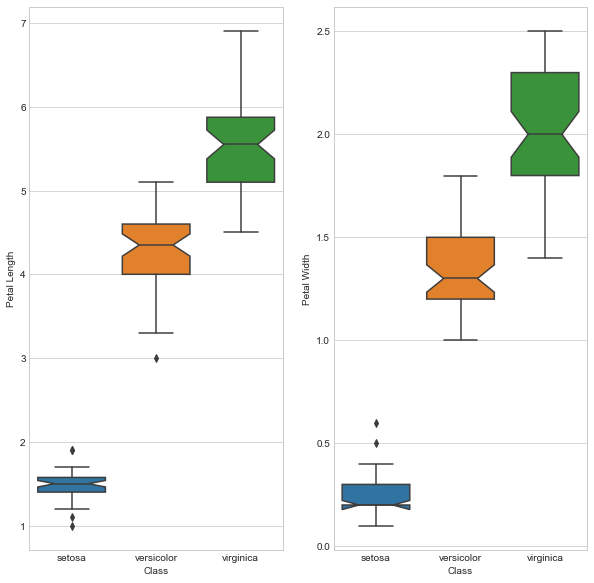

In [13]:
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(10,10))
sns.boxplot(x='Class', y='Petal Length', data=df, ax=ax1,notch=True)
sns.boxplot(x='Class', y='Petal Width', data=df, ax=ax2, notch=True)
plt.show()

E:\Anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


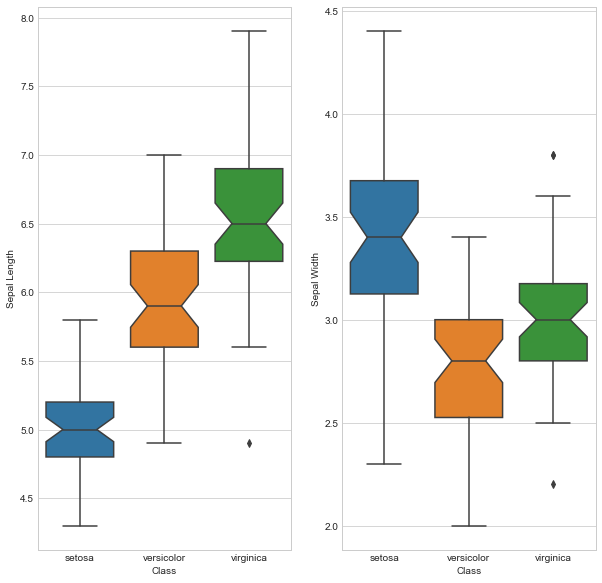

In [14]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(10,10))
sns.boxplot(x='Class', y='Sepal Length', data=df, ax=ax1, notch=True)
sns.boxplot(x='Class', y='Sepal Width', data=df, ax=ax2, notch=True)

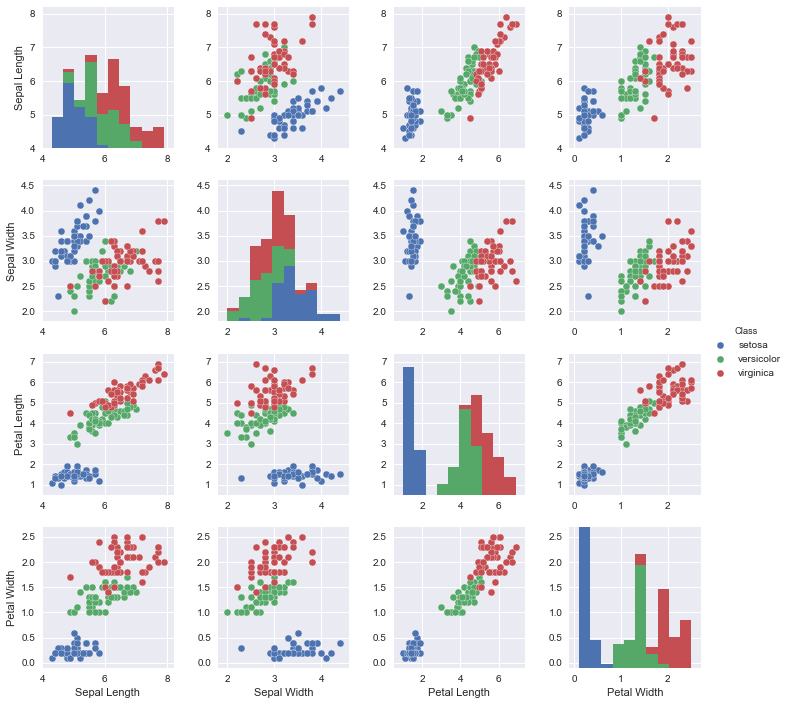

In [15]:
sns.set()
sns.pairplot(df, hue='Class')

In [16]:
#normalizing the data for better learning results
normalize = {'setosa' : 1, 'versicolor' : 2, 'virginica' : 3}
df['Class'] = df['Class'].map(normalize)
y = df['Class']
X = df.drop('Class', axis=1)

In [17]:
validation_size = 0.2
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=validation_size)

In [18]:
scoring = 'accuracy'
models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Support Vector Machine' : LinearSVC(),
    'Random Forest' : RandomForestClassifier(),
    'Gaussian Naive Bayes' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Stochastic gradient descent' : SGDClassifier(max_iter=5, tol=None),
    'Perceptron' : Perceptron(max_iter=5, tol=None)
}

In [19]:
results =[]
model_names = []
for name, model in models.items():
    kfold =model_selection.KFold(n_splits=10, random_state =7)
    result = model_selection.cross_val_score(model,X_train, y_train, cv=kfold,scoring=scoring)
    model_names.append(name)
    results.append(result)
    print("%s: %f (%f)" % (name, result.mean(), result.std()))

Logistic Regression: 0.941667 (0.053359)
KNN: 0.941667 (0.065085)
Support Vector Machine: 0.950000 (0.055277)
Random Forest: 0.933333 (0.081650)
Gaussian Naive Bayes: 0.958333 (0.055902)
Decision Tree: 0.933333 (0.072648)
Stochastic gradient descent: 0.691667 (0.175000)
Perceptron: 0.633333 (0.158990)


In [20]:
model_comparison = pd.DataFrame(OrderedDict({
    'Model Name' : model_names,
    'Score Mean' : [item.mean() for item in results],
    'Score Deviation' : [item.std() for item in results]
}))

model_comparison.head(10)

,Model Name,Score Mean,Score Deviation
0,Logistic Regression,0.941667,0.053359
1,KNN,0.941667,0.065085
2,Support Vector Machine,0.950000,0.055277
3,Random Forest,0.933333,0.081650
4,Gaussian Naive Bayes,0.958333,0.055902
5,Decision Tree,0.933333,0.072648
6,Stochastic gradient descent,0.691667,0.175000
7,Perceptron,0.633333,0.158990


In [21]:
model_comparison = model_comparison.sort_values(by='Score Mean', ascending=False)
model_comparison = model_comparison.reset_index(drop=True)
model_comparison.head(10)

,Model Name,Score Mean,Score Deviation
0,Gaussian Naive Bayes,0.958333,0.055902
1,Support Vector Machine,0.950000,0.055277
2,KNN,0.941667,0.065085
3,Logistic Regression,0.941667,0.053359
4,Random Forest,0.933333,0.081650
5,Decision Tree,0.933333,0.072648
6,Stochastic gradient descent,0.691667,0.175000
7,Perceptron,0.633333,0.158990


Iris dataset is small, clean and well optimazied. Most of algorithms show close results. 